In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Librerías importadas correctamente ✓")

Librerías importadas correctamente ✓


## 1. Cargar datos procesados

In [3]:
# Cargar dataset principal
df_eph = pd.read_parquet("../datos/processed/eph_consolidado.parquet")

# Cargar tasas laborales
df_tasas = pd.read_csv("../datos/processed/tasas_laborales.csv")

# Cargar IPC
df_ipc = pd.read_csv("../datos/processed/ipc.csv")

print(f"Dataset EPH: {df_eph.shape}")
print(f"Tasas laborales: {df_tasas.shape}")
print(f"IPC: {df_ipc.shape}")
print("\nDatos cargados correctamente ✓")

Dataset EPH: (987193, 251)
Tasas laborales: (22, 7)
IPC: (40, 2)

Datos cargados correctamente ✓


## 2. Evolución de la Tasa de Desocupación

In [4]:
# Estadísticas descriptivas de la tasa de desocupación
print("="*60)
print("TASA DE DESOCUPACIÓN - Estadísticas Descriptivas")
print("="*60)

print(f"\nMedia: {df_tasas['tasa_desocupacion'].mean():.2f}%")
print(f"Mediana: {df_tasas['tasa_desocupacion'].median():.2f}%")
print(f"Desviación estándar: {df_tasas['tasa_desocupacion'].std():.2f}%")
print(f"\nMínimo: {df_tasas['tasa_desocupacion'].min():.2f}% ({df_tasas.loc[df_tasas['tasa_desocupacion'].idxmin(), 'periodo']})")
print(f"Máximo: {df_tasas['tasa_desocupacion'].max():.2f}% ({df_tasas.loc[df_tasas['tasa_desocupacion'].idxmax(), 'periodo']})")

print(f"\nCuartiles:")
print(df_tasas['tasa_desocupacion'].describe()[['25%', '50%', '75%']])

TASA DE DESOCUPACIÓN - Estadísticas Descriptivas

Media: 9.01%
Mediana: 9.06%
Desviación estándar: 1.77%

Mínimo: 5.73% (2023-T4)
Máximo: 13.08% (2020-T2)

Cuartiles:
25%   7.60
50%   9.06
75%   9.99
Name: tasa_desocupacion, dtype: float64


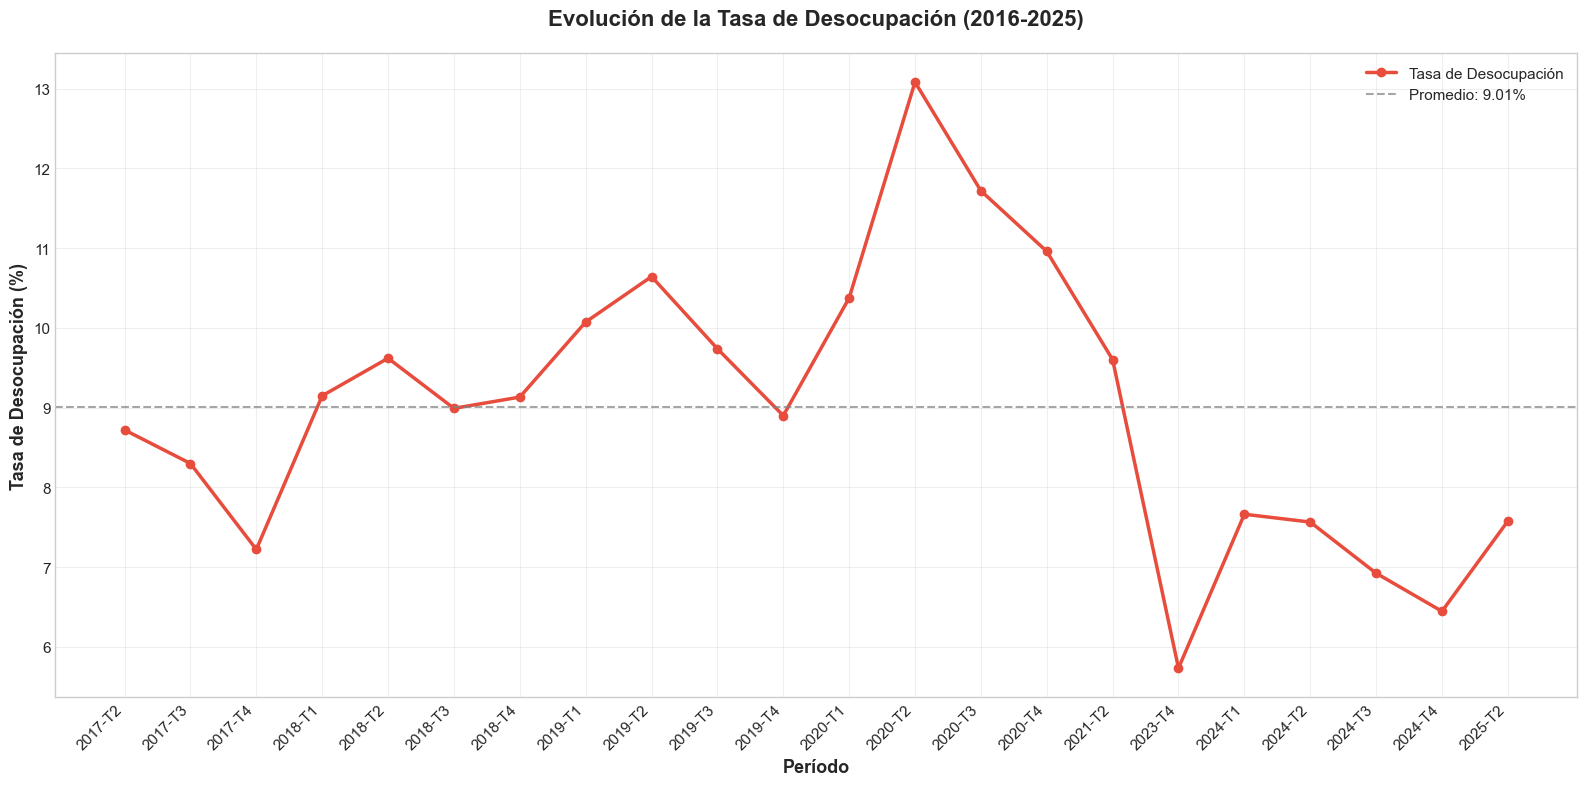

✓ Gráfico guardado: evolucion_desocupacion.png


In [5]:
# Gráfico de evolución de tasa de desocupación
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df_tasas['periodo'], df_tasas['tasa_desocupacion'], 
        marker='o', linewidth=2.5, markersize=6, color='#e74c3c', label='Tasa de Desocupación')

# Línea de promedio
promedio = df_tasas['tasa_desocupacion'].mean()
ax.axhline(y=promedio, color='gray', linestyle='--', linewidth=1.5, 
           label=f'Promedio: {promedio:.2f}%', alpha=0.7)

ax.set_xlabel('Período', fontsize=13, fontweight='bold')
ax.set_ylabel('Tasa de Desocupación (%)', fontsize=13, fontweight='bold')
ax.set_title('Evolución de la Tasa de Desocupación (2016-2025)', 
             fontsize=16, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar gráfico
plt.savefig('../resultados/graficos/evolucion_desocupacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: evolucion_desocupacion.png")

## 3. Evolución de la Tasa de Empleo

In [ ]:
# Estadísticas descriptivas de la tasa de empleo
print("="*60)
print("TASA DE EMPLEO - Estadísticas Descriptivas")
print("="*60)

print(f"\nMedia: {df_tasas['tasa_empleo'].mean():.2f}%")
print(f"Mediana: {df_tasas['tasa_empleo'].median():.2f}%")
print(f"Desviación estándar: {df_tasas['tasa_empleo'].std():.2f}%")
print(f"\nMínimo: {df_tasas['tasa_empleo'].min():.2f}% ({df_tasas.loc[df_tasas['tasa_empleo'].idxmin(), 'periodo']})")
print(f"Máximo: {df_tasas['tasa_empleo'].max():.2f}% ({df_tasas.loc[df_tasas['tasa_empleo'].idxmax(), 'periodo']})")

print(f"\nCuartiles:")
print(df_tasas['tasa_empleo'].describe()[['25%', '50%', '75%']])

In [ ]:
# Gráfico de evolución de tasa de empleo
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df_tasas['periodo'], df_tasas['tasa_empleo'], 
        marker='s', linewidth=2.5, markersize=6, color='#27ae60', label='Tasa de Empleo')

# Línea de promedio
promedio = df_tasas['tasa_empleo'].mean()
ax.axhline(y=promedio, color='gray', linestyle='--', linewidth=1.5, 
           label=f'Promedio: {promedio:.2f}%', alpha=0.7)

ax.set_xlabel('Período', fontsize=13, fontweight='bold')
ax.set_ylabel('Tasa de Empleo (%)', fontsize=13, fontweight='bold')
ax.set_title('Evolución de la Tasa de Empleo (2016-2025)', 
             fontsize=16, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../resultados/graficos/evolucion_empleo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: evolucion_empleo.png")

## 4. Evolución de la Tasa de Actividad

In [ ]:
# Estadísticas descriptivas de la tasa de actividad
print("="*60)
print("TASA DE ACTIVIDAD - Estadísticas Descriptivas")
print("="*60)

print(f"\nMedia: {df_tasas['tasa_actividad'].mean():.2f}%")
print(f"Mediana: {df_tasas['tasa_actividad'].median():.2f}%")
print(f"Desviación estándar: {df_tasas['tasa_actividad'].std():.2f}%")
print(f"\nMínimo: {df_tasas['tasa_actividad'].min():.2f}% ({df_tasas.loc[df_tasas['tasa_actividad'].idxmin(), 'periodo']})")
print(f"Máximo: {df_tasas['tasa_actividad'].max():.2f}% ({df_tasas.loc[df_tasas['tasa_actividad'].idxmax(), 'periodo']})")

print(f"\nCuartiles:")
print(df_tasas['tasa_actividad'].describe()[['25%', '50%', '75%']])

In [ ]:
# Gráfico de evolución de tasa de actividad
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df_tasas['periodo'], df_tasas['tasa_actividad'], 
        marker='^', linewidth=2.5, markersize=6, color='#3498db', label='Tasa de Actividad')

# Línea de promedio
promedio = df_tasas['tasa_actividad'].mean()
ax.axhline(y=promedio, color='gray', linestyle='--', linewidth=1.5, 
           label=f'Promedio: {promedio:.2f}%', alpha=0.7)

ax.set_xlabel('Período', fontsize=13, fontweight='bold')
ax.set_ylabel('Tasa de Actividad (%)', fontsize=13, fontweight='bold')
ax.set_title('Evolución de la Tasa de Actividad (2016-2025)', 
             fontsize=16, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../resultados/graficos/evolucion_actividad.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: evolucion_actividad.png")

## 5. Gráfico Combinado de las Tres Tasas

In [ ]:
# Gráfico con las tres tasas juntas
fig, ax = plt.subplots(figsize=(18, 9))

ax.plot(df_tasas['periodo'], df_tasas['tasa_desocupacion'], 
        marker='o', linewidth=2.5, markersize=6, color='#e74c3c', label='Tasa de Desocupación')

ax.plot(df_tasas['periodo'], df_tasas['tasa_empleo'], 
        marker='s', linewidth=2.5, markersize=6, color='#27ae60', label='Tasa de Empleo')

ax.plot(df_tasas['periodo'], df_tasas['tasa_actividad'], 
        marker='^', linewidth=2.5, markersize=6, color='#3498db', label='Tasa de Actividad')

ax.set_xlabel('Período', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold')
ax.set_title('Evolución de Indicadores del Mercado Laboral (2016-2025)', 
             fontsize=17, fontweight='bold', pad=20)

ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../resultados/graficos/tasas_combinadas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: tasas_combinadas.png")

## 6. Análisis de Ingresos Reales

In [ ]:
# Filtrar solo personas ocupadas con ingresos declarados
columna_ingreso = 'P21_real' if 'P21_real' in df_eph.columns else 'P47T_real'

df_ocupados = df_eph[
    (df_eph['es_ocupado']) & 
    (df_eph[columna_ingreso].notna()) & 
    (df_eph[columna_ingreso] > 0)
].copy()

print(f"Registros de ocupados con ingreso válido: {len(df_ocupados):,}")
print(f"Columna de ingreso utilizada: {columna_ingreso}")

In [ ]:
# Calcular estadísticas de ingresos por período
ingresos_periodo = []

for periodo in sorted(df_ocupados['periodo'].unique()):
    df_periodo = df_ocupados[df_ocupados['periodo'] == periodo]
    
    # Calcular estadísticas ponderadas
    ingresos = df_periodo[columna_ingreso]
    ponderadores = df_periodo['PONDERA']
    
    # Media ponderada
    media = np.average(ingresos, weights=ponderadores)
    
    # Percentiles ponderados (aproximación)
    sorted_idx = np.argsort(ingresos)
    sorted_ingresos = ingresos.iloc[sorted_idx].values
    sorted_ponderadores = ponderadores.iloc[sorted_idx].values
    cumsum = np.cumsum(sorted_ponderadores)
    cumsum = cumsum / cumsum[-1]
    
    p25 = sorted_ingresos[np.searchsorted(cumsum, 0.25)]
    p50 = sorted_ingresos[np.searchsorted(cumsum, 0.50)]
    p75 = sorted_ingresos[np.searchsorted(cumsum, 0.75)]
    
    ingresos_periodo.append({
        'periodo': periodo,
        'ingreso_medio': media,
        'ingreso_mediano': p50,
        'p25': p25,
        'p75': p75
    })

df_ingresos = pd.DataFrame(ingresos_periodo)

print("\nEstadísticas de ingresos calculadas ✓")
print("\nPrimeros períodos:")
df_ingresos.head(10)

In [ ]:
# Estadísticas descriptivas generales de ingresos
print("="*60)
print("INGRESOS REALES - Estadísticas Descriptivas")
print("="*60)

print(f"\nIngreso medio promedio (todo el período): ${df_ingresos['ingreso_medio'].mean():,.2f}")
print(f"Ingreso mediano promedio (todo el período): ${df_ingresos['ingreso_mediano'].mean():,.2f}")

print(f"\nMáximo ingreso medio: ${df_ingresos['ingreso_medio'].max():,.2f} ({df_ingresos.loc[df_ingresos['ingreso_medio'].idxmax(), 'periodo']})")
print(f"Mínimo ingreso medio: ${df_ingresos['ingreso_medio'].min():,.2f} ({df_ingresos.loc[df_ingresos['ingreso_medio'].idxmin(), 'periodo']})")

In [ ]:
# Gráfico de evolución de ingresos
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df_ingresos['periodo'], df_ingresos['ingreso_medio'], 
        marker='o', linewidth=2.5, markersize=6, color='#9b59b6', label='Ingreso Medio')

ax.plot(df_ingresos['periodo'], df_ingresos['ingreso_mediano'], 
        marker='s', linewidth=2.5, markersize=6, color='#e67e22', label='Ingreso Mediano')

# Sombreado entre percentiles 25 y 75
ax.fill_between(df_ingresos['periodo'], df_ingresos['p25'], df_ingresos['p75'], 
                alpha=0.2, color='gray', label='Rango P25-P75')

ax.set_xlabel('Período', fontsize=13, fontweight='bold')
ax.set_ylabel('Ingreso Real ($ constantes)', fontsize=13, fontweight='bold')
ax.set_title('Evolución de Ingresos Reales de Ocupados (2016-2025)', 
             fontsize=16, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

# Formato de eje y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../resultados/graficos/evolucion_ingresos.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: evolucion_ingresos.png")

## 7. Tabla Resumen de Todos los Indicadores

In [ ]:
# Combinar todas las métricas
df_resumen = df_tasas.merge(df_ingresos, on='periodo', how='left')

# Seleccionar columnas para el resumen
df_resumen_export = df_resumen[[
    'periodo', 
    'tasa_actividad', 
    'tasa_empleo', 
    'tasa_desocupacion',
    'ingreso_medio',
    'ingreso_mediano'
]].copy()

# Renombrar columnas
df_resumen_export.columns = [
    'Período',
    'Tasa Actividad (%)',
    'Tasa Empleo (%)',
    'Tasa Desocupación (%)',
    'Ingreso Medio Real ($)',
    'Ingreso Mediano Real ($)'
]

# Guardar tabla
df_resumen_export.to_csv('../resultados/tablas/resumen_indicadores.csv', index=False)
print("✓ Tabla guardada: resumen_indicadores.csv")

# Mostrar primeros registros
print("\nPrimeros registros de la tabla resumen:")
df_resumen_export.head(12)

## 8. Boxplots de Distribución de Indicadores

In [ ]:
# Crear boxplots para visualizar la distribución de cada indicador
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot de tasa de desocupación
axes[0, 0].boxplot([df_tasas['tasa_desocupacion']], labels=[''], vert=True)
axes[0, 0].set_ylabel('Porcentaje (%)', fontsize=11)
axes[0, 0].set_title('Distribución: Tasa de Desocupación', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Boxplot de tasa de empleo
axes[0, 1].boxplot([df_tasas['tasa_empleo']], labels=[''], vert=True)
axes[0, 1].set_ylabel('Porcentaje (%)', fontsize=11)
axes[0, 1].set_title('Distribución: Tasa de Empleo', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot de tasa de actividad
axes[1, 0].boxplot([df_tasas['tasa_actividad']], labels=[''], vert=True)
axes[1, 0].set_ylabel('Porcentaje (%)', fontsize=11)
axes[1, 0].set_title('Distribución: Tasa de Actividad', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Boxplot de ingresos
axes[1, 1].boxplot([df_ingresos['ingreso_medio'].dropna()], labels=[''], vert=True)
axes[1, 1].set_ylabel('Ingreso Real ($)', fontsize=11)
axes[1, 1].set_title('Distribución: Ingreso Medio Real', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Distribución de Indicadores del Mercado Laboral (2016-2025)', 
             fontsize=16, fontweight='bold', y=1.00)

plt.tight_layout()
plt.savefig('../resultados/graficos/distribucion_indicadores.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: distribucion_indicadores.png")

## 9. Resumen Final

In [ ]:
print("="*70)
print("RESUMEN DEL ANÁLISIS UNIVARIADO")
print("="*70)

print("\n1. TASA DE DESOCUPACIÓN")
print(f"   Media: {df_tasas['tasa_desocupacion'].mean():.2f}%")
print(f"   Rango: {df_tasas['tasa_desocupacion'].min():.2f}% - {df_tasas['tasa_desocupacion'].max():.2f}%")

print("\n2. TASA DE EMPLEO")
print(f"   Media: {df_tasas['tasa_empleo'].mean():.2f}%")
print(f"   Rango: {df_tasas['tasa_empleo'].min():.2f}% - {df_tasas['tasa_empleo'].max():.2f}%")

print("\n3. TASA DE ACTIVIDAD")
print(f"   Media: {df_tasas['tasa_actividad'].mean():.2f}%")
print(f"   Rango: {df_tasas['tasa_actividad'].min():.2f}% - {df_tasas['tasa_actividad'].max():.2f}%")

print("\n4. INGRESOS REALES")
print(f"   Ingreso medio promedio: ${df_ingresos['ingreso_medio'].mean():,.2f}")
print(f"   Ingreso mediano promedio: ${df_ingresos['ingreso_mediano'].mean():,.2f}")

print(f"\n{'='*70}")
print("Archivos generados:")
print("  • evolucion_desocupacion.png")
print("  • evolucion_empleo.png")
print("  • evolucion_actividad.png")
print("  • tasas_combinadas.png")
print("  • evolucion_ingresos.png")
print("  • distribucion_indicadores.png")
print("  • resumen_indicadores.csv")
print(f"{'='*70}")